In [1]:
# Load the pandas package
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
# Load the rock.csv dataset
rock = pd.read_csv('rock.csv')

In [3]:
# Display the rock dataframe
rock

,Area,Perimeter,Shape,Permeability
0,4990,2791.900,0.090330,6.3
1,7002,3892.600,0.148622,6.3
2,7558,3930.660,0.183312,6.3
3,7352,3869.320,0.117063,6.3
4,7943,3948.540,0.122417,17.1
5,7979,4010.150,0.167045,17.1
6,9333,4345.750,0.189651,17.1
7,8209,4344.750,0.164127,17.1
8,8393,3682.040,0.203654,119.0
9,6425,3098.650,0.162394,119.0


<Axes: >

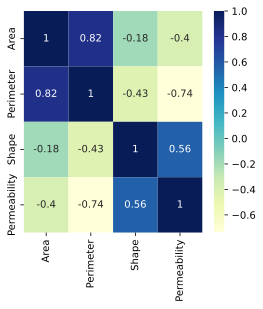

In [4]:
# Display the correlation matrix using a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(rock.corr(), cmap="YlGnBu", annot=True)

Text(0, 0.5, 'Area')

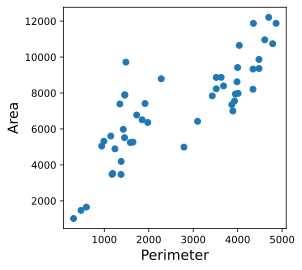

In [5]:
# Create a scatter plot using perimeter and area
plt.figure(figsize=(4, 4))
plt.scatter(rock['Perimeter'], rock['Area'])
plt.xlabel('Perimeter', fontsize=14)
plt.ylabel('Area', fontsize=14)

Text(0, 0.5, 'Area')

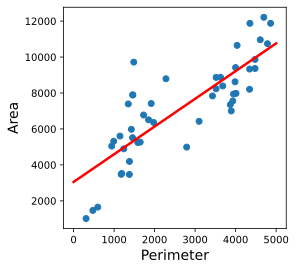

In [6]:
# Create a scatter plot with a linear regression line
model = st.linregress(rock['Perimeter'], rock['Area'])
plt.figure(figsize=(4, 4))
plt.scatter(rock['Perimeter'], rock['Area'])
x = np.linspace(0, 5000, 10000)
y = model[0] * x + model[1]
plt.plot(x, y, '-r', linewidth=2.5)
plt.xlabel('Perimeter', fontsize=14)
plt.ylabel('Area', fontsize=14)

In [7]:
# Scale the data
scaler = StandardScaler()
rock = pd.DataFrame(
    scaler.fit_transform(rock), columns=['Area', 'Perimeter', 'Shape', 'Permeability']
)

In [8]:
# Initialize and fit a PCA model on the rock data
pcaModel = PCA(n_components=4)
pcaModel.fit(rock)

PCA(n_components=4)

In [9]:
# Display the components
pcaModel.components_

array([[-0.47442375, -0.58862858,  0.3932268 ,  0.5232697 ],
       [ 0.60461291,  0.23665879,  0.70542154,  0.28428208],
       [-0.37639417,  0.06308377,  0.58863352, -0.71264188],
       [ 0.51739034, -0.77040862, -0.03554881, -0.3708289 ]])

In [10]:
# Display the explained variance (eigenvalues)
pcaModel.explained_variance_

array([2.66447132, 0.94255618, 0.40448323, 0.07359565])

In [11]:
# Show the factor loadings
pcaModel.components_.T * np.sqrt(pcaModel.explained_variance_)

array([[-0.77441178,  0.58699046, -0.23938291,  0.14036034],
       [-0.9608307 ,  0.22976097,  0.04012064, -0.20900045],
       [ 0.6418723 ,  0.68486084,  0.37436501, -0.00964387],
       [ 0.85414403,  0.2759962 , -0.45323308, -0.10060039]])

Text(0, 0.5, 'Eigenvalues')

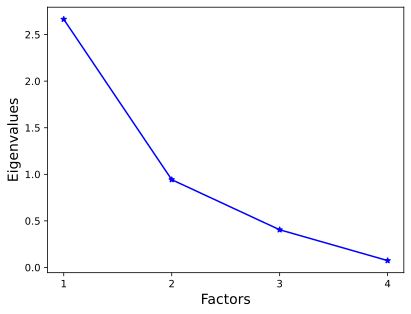

In [12]:
# Create a scree plot
xint = range(0, 5)
plt.xticks(xint)
plt.plot([1, 2, 3, 4], pcaModel.explained_variance_, 'b*-')
plt.xlabel('Factors', fontsize='14')
plt.ylabel('Eigenvalues', fontsize='14')